In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/My Drive/

data_dir = '/content/gdrive/My Drive/Rivers V2/Datasets/Original Unmodified Dataset/'
#data_dir = '/content/gdrive/My Drive/full_dataset-Resize/'

Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:
Name=[]
for file in os.listdir(data_dir):
    Name+=[file]
    
print(Name)
print(len(Name))

['Clear Glass Bottle', 'Clear Plastic Bags', 'Cans', 'Coloured Plastic Bottle', 'Clear Plastic Bottle', 'Coloured Plastic Bags']
6


In [ ]:
dataset=[]
count=0
for file in os.listdir(data_dir):
    path=os.path.join(data_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1

n=len(dataset)
print(n)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


1600


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [ ]:
num=[]
for i in range(n):
    num+=[i]
random.shuffle(num)
print(num[0:5])

[492, 1427, 186, 939, 1565]


In [ ]:
data,labels=zip(*dataset)
data=np.array(data)
labels=np.array(labels)

train=data[num[0:(n//10)*8]]
trainlabel=labels[num[0:(n//10)*8]]

test=data[num[(n//10)*8:]]
testlabel=labels[num[(n//10)*8:]]

In [ ]:
trainlabel2=to_categorical(trainlabel)

trainx,testx,trainy,testy=train_test_split(train,trainlabel2,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(1024, 100, 100, 3)
(256, 100, 100, 3)
(1024, 6)
(256, 6)


In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(6, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(6, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1, brightness_range=[0.5,1.4], fill_mode="nearest")

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=8),validation_data=(testx,testy),epochs=30)


Epoch 1/30
128/128 [==============================] - 73s 568ms/step - loss: 1.7754 - accuracy: 0.1943 - val_loss: 1.7782 - val_accuracy: 0.1758
Epoch 2/30
128/128 [==============================] - 72s 567ms/step - loss: 1.7750 - accuracy: 0.1943 - val_loss: 1.7780 - val_accuracy: 0.1758
Epoch 3/30
128/128 [==============================] - 73s 571ms/step - loss: 1.7747 - accuracy: 0.1943 - val_loss: 1.7779 - val_accuracy: 0.1758
Epoch 4/30
128/128 [==============================] - 73s 574ms/step - loss: 1.7745 - accuracy: 0.1943 - val_loss: 1.7778 - val_accuracy: 0.1758
Epoch 5/30
128/128 [==============================] - 73s 570ms/step - loss: 1.7742 - accuracy: 0.1943 - val_loss: 1.7778 - val_accuracy: 0.1758
Epoch 6/30
128/128 [==============================] - 74s 578ms/step - loss: 1.7741 - accuracy: 0.1943 - val_loss: 1.7777 - val_accuracy: 0.1758
Epoch 7/30
128/128 [==============================] - 80s 624ms/step - loss: 1.7741 - accuracy: 0.1943 - val_loss: 1.7777 - val_ac

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.18      1.00      0.30        45
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        30

    accuracy                           0.18       256
   macro avg       0.03      0.17      0.05       256
weighted avg       0.03      0.18      0.05       256



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


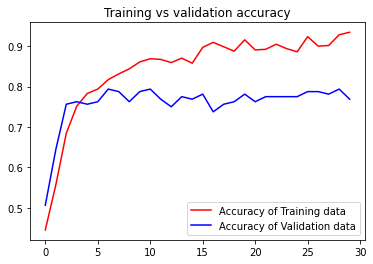

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

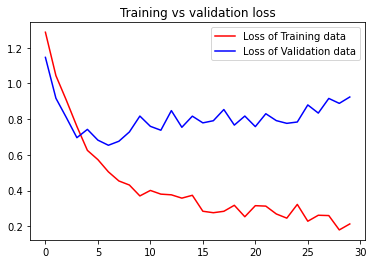

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

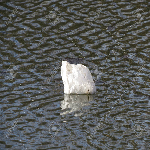

In [ ]:
load_img("/content/gdrive/My Drive/L_006.jpg",target_size=(150,150))

In [ ]:
image=load_img("/content/gdrive/My Drive/L_006.jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is Clear Plastic Bags.


In [ ]:
print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]

(209, 100, 100, 3)
(209, 4)


In [ ]:
ANS=testlabel

In [ ]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.8421052631578947
